5. 삼성전자 주식 다음달 가격이 얼마일까? (회귀)
6. 비트코인 다음달 어떻게 될까? (회귀)
7. 전날 비트코인 상승하면 다음날 주가와의 상관관계 (correlation)

1. 목표 설정
    1. Y : 미래의 30일의 종가
    1. X : 최근 60일간의 데이터
        1. step: 하루 간격
        1. 양 : 1년 (2018년 6월~2019년 6월)
1. 데이터 획득
    1. 국내기업 1개, 비트코인
1. 데이터 정제
    1. 누락
1. 데이터 전처리
    1. 특수기호, 문자 -> 수치 변환
    1. 두 데이터 날짜 기준으로 통합(axis =1)
        1. 외국(2018-01-01), 국내 (2018.01.01, (18,1,1)
        1. 날짜 포맷을 (YYYY-MM-DD)으로 변환 후 통합
    - 주의 : 삼성 주식분할
1. 비트코인 가격변화와 다음날 주가와의 상관관계 (correlation)
    1. cov()
1. 입력 X, 출력 Y 분리
    1. m개의 x, y 쌍
    1. x(m, 60, 10~15) (국내 증시컬럼 + 비트코인컬림) > reshape -> (m, 60 * 15)
    1. y(m. 30, 1) # (m. 30) 형태로 봐야한다 
1. 학습용/검증용(test) 분리
    1. 섞으면 안되므로 직접 분리
    1. 가장 과거의 데이터 10% 를 검증용으로 사용
1. 모델 선정
    1. Ridge (회귀) 모델, 학습용 데이터로 학습
    1. 성능 측정
1. 그래프로 시각화
    1. 과거
    1. 미래예측 predict ( x(1, 60 * 15)) -> return -> y_hat(1, 30 * 2)
        1. 미래예측(1, 30 * 2) -> (30, 2) ->국내 (30), 비트코인(30) -> 그래프로 그리기

 국내 기업 데이터 획득

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
samsung_url = 'https://finance.naver.com/item/sise_day.nhn?code=005930'

In [34]:
tables = pd.read_html(samsung_url + '&pages='+str(1))
len(tables)
samsung = tables[0]
samsung.shape

(15, 7)

In [75]:
samsung = samsung.set_index('날짜')
samsung

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019.07.03,45500.0,750.0,45750.0,46350.0,45450.0,4573226.0
2019.07.02,46250.0,350.0,46200.0,46900.0,45850.0,8463073.0
2019.07.01,46600.0,400.0,47350.0,47400.0,46250.0,11383522.0
2019.06.28,47000.0,500.0,47000.0,47000.0,46700.0,12949231.0
2019.06.27,46500.0,800.0,46000.0,46600.0,45750.0,12603534.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
samsungs = []
for i in range(1, 28):
    tables = pd.read_html(samsung_url+'&page='+str(i))
    samsung = tables[0]
    samsungs.append(samsung)
len(samsungs)

27

In [73]:
samsung = pd.concat(samsungs, axis =0)
samsung.shape

(405, 7)

In [10]:
# 몇번 째 테이블이 일일 데이터일까 찾기
for t in tables:
    print (t.shape)

(15, 7)
(1, 12)


In [74]:
samsung.tail()

,날짜,종가,전일비,시가,고가,저가,거래량
10,2018.05.31,50700.0,1200.0,50400.0,50800.0,49850.0,63491109.0
11,2018.05.30,49500.0,1800.0,51300.0,51500.0,49100.0,20498098.0
12,2018.05.29,51300.0,1000.0,52200.0,52500.0,51300.0,8480437.0
13,2018.05.28,52300.0,400.0,52500.0,53000.0,52000.0,9787820.0
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
bitcoin_url = 'https://coinmarketcap.com/ko/currencies/bitcoin/historical-data/?start=20180601&end=20190601'
tables = pd.read_html(bitcoin_url)
len(tables)

2

In [22]:
bitcoin = tables[0]
bitcoin.shape

(366, 7)

In [37]:
bitcoin.head()

,시가*,고가,저가,종가**,거래량,시가총액
날짜,,,,,,
2019. 06. 01.,8573.84,8625.60,8481.58,8564.02,22488303544,151890214310
2019. 05. 31.,8320.29,8586.66,8172.55,8574.50,25365190957,152059886414
2019. 05. 30.,8661.76,9008.31,8221.27,8319.47,29246528551,147525141134
2019. 05. 29.,8718.59,8755.85,8482.73,8659.49,23473479966,153537047655
2019. 05. 28.,8802.76,8807.02,8634.72,8719.96,24226919267,154590202287


In [70]:
samsung.head()

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.07.03,45600.0,650.0,45750.0,46350.0,45450.0,4482784.0
2,2019.07.02,46250.0,350.0,46200.0,46900.0,45850.0,8463073.0
3,2019.07.01,46600.0,400.0,47350.0,47400.0,46250.0,11383522.0
4,2019.06.28,47000.0,500.0,47000.0,47000.0,46700.0,12949231.0


In [26]:
samsung.shape, bitcoin.shape

((405, 7), (366, 7))

In [36]:
bitcoin = bitcoin.set_index('날짜')

In [39]:
# 인덱스 타입이 object
samsung.index

Index([         nan, '2019.07.03', '2019.07.02', '2019.07.01', '2019.06.28',
       '2019.06.27',          nan,          nan,          nan, '2019.06.26',
       '2019.06.25', '2019.06.24', '2019.06.21', '2019.06.20',          nan],
      dtype='object', name='날짜')

In [46]:
bitcoin.index = pd.to_datetime(bitcoin.index)

In [65]:
pd.to_datetime(bitcoin.index)

DatetimeIndex(['2019-06-01', '2019-05-31', '2019-05-30', '2019-05-29',
               '2019-05-28', '2019-05-27', '2019-05-26', '2019-05-25',
               '2019-05-24', '2019-05-23',
               ...
               '2018-06-10', '2018-06-09', '2018-06-08', '2018-06-07',
               '2018-06-06', '2018-06-05', '2018-06-04', '2018-06-03',
               '2018-06-02', '2018-06-01'],
              dtype='datetime64[ns]', name='날짜', length=366, freq=None)

In [76]:
samsung.index = pd.to_datetime(samsung.index)

In [77]:
pd.to_datetime(samsung.index)

DatetimeIndex([       'NaT', '2019-07-03', '2019-07-02', '2019-07-01',
               '2019-06-28', '2019-06-27',        'NaT',        'NaT',
                      'NaT', '2019-06-26',
               ...
               '2018-06-04',        'NaT',        'NaT',        'NaT',
               '2018-06-01', '2018-05-31', '2018-05-30', '2018-05-29',
               '2018-05-28',        'NaT'],
              dtype='datetime64[ns]', name='날짜', length=405, freq=None)

In [53]:
bitcoin.head()

,시가*,고가,저가,종가**,거래량,시가총액
날짜,,,,,,
2019-06-01,8573.84,8625.60,8481.58,8564.02,22488303544,151890214310
2019-05-31,8320.29,8586.66,8172.55,8574.50,25365190957,152059886414
2019-05-30,8661.76,9008.31,8221.27,8319.47,29246528551,147525141134
2019-05-29,8718.59,8755.85,8482.73,8659.49,23473479966,153537047655
2019-05-28,8802.76,8807.02,8634.72,8719.96,24226919267,154590202287


In [60]:
samsung.head()

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-03,45600.0,650.0,45750.0,46350.0,45550.0,3841078.0
2019-07-02,46250.0,350.0,46200.0,46900.0,45850.0,8463073.0
2019-07-01,46600.0,400.0,47350.0,47400.0,46250.0,11383522.0
2019-06-28,47000.0,500.0,47000.0,47000.0,46700.0,12949231.0


# 데이터 통합
- 두 데이터 날짜 기준으로 통합(axis =1)
- 외국(2018-01-01), 국내 (2018.01.01, (18,1,1)
- 날짜 포맷을 (YYYY-MM-DD)으로 변환 후 통합


In [78]:
df = pd.concat((samsung, bitcoin), axis =1).dropna()
df.shape

(244, 12)

In [79]:
df.isna().sum().sum()

0

In [80]:
df.describe()

,종가,전일비,시가,고가,저가,거래량,시가*,고가,저가,종가**,거래량,시가총액
count,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02,244.000000,244.000000,244.000000,244.000000,2.440000e+02,2.440000e+02
mean,44541.393443,524.590164,44541.393443,44982.786885,44080.122951,1.127346e+07,5598.614672,5708.022869,5487.953197,5597.538361,8.087400e+09,9.730654e+10
std,2616.501077,445.496251,2663.568359,2616.332608,2605.084532,3.923683e+06,1514.608753,1542.730010,1476.931675,1512.541132,6.225952e+09,2.597773e+10
min,37450.000000,0.000000,37450.000000,37600.000000,36850.000000,4.762460e+06,3253.120000,3329.560000,3206.540000,3242.480000,3.230550e+09,5.649438e+10
25%,43012.500000,200.000000,43012.500000,43437.500000,42400.000000,8.298381e+06,3957.602500,4031.850000,3899.502500,3956.197500,4.324805e+09,6.936442e+10
50%,44975.000000,400.000000,44925.000000,45500.000000,44500.000000,1.079669e+07,6205.425000,6300.355000,6029.725000,6179.620000,5.304537e+09,1.064328e+11
75%,46362.500000,762.500000,46462.500000,46850.000000,46000.000000,1.305694e+07,6599.830000,6743.025000,6498.092500,6601.707500,9.347169e+09,1.140496e+11
max,51300.000000,2200.000000,51800.000000,51800.000000,50700.000000,2.625465e+07,8802.760000,9008.310000,8668.700000,8805.780000,3.316720e+10,1.560938e+11


In [81]:

df.cov() #상관관계

,종가,전일비,시가,고가,저가,거래량,시가*,고가,저가,종가**,거래량,시가총액
종가,6.846078e+06,-1.755498e+04,6.807220e+06,6.780417e+06,6.748902e+06,-1.768174e+09,1.509873e+06,1.509372e+06,1.519761e+06,1.530810e+06,-1.766514e+12,2.530176e+13
전일비,-1.755498e+04,1.984669e+05,-1.146445e+04,2.638181e+04,-4.971497e+04,8.561799e+08,-1.569126e+04,-2.158713e+04,-1.742792e+04,-2.561715e+04,-1.813583e+11,-4.628508e+11
시가,6.807220e+06,-1.146445e+04,7.094596e+06,6.898380e+06,6.874931e+06,-1.543646e+09,1.544614e+06,1.544355e+06,1.547371e+06,1.560183e+06,-1.646136e+12,2.579749e+13
고가,6.780417e+06,2.638181e+04,6.898380e+06,6.845196e+06,6.757650e+06,-1.307755e+09,1.532320e+06,1.531849e+06,1.541699e+06,1.551951e+06,-1.657222e+12,2.567207e+13
저가,6.748902e+06,-4.971497e+04,6.874931e+06,6.757650e+06,6.786465e+06,-1.902252e+09,1.518191e+06,1.521359e+06,1.524395e+06,1.540312e+06,-1.758229e+12,2.544846e+13
거래량,-1.768174e+09,8.561799e+08,-1.543646e+09,-1.307755e+09,-1.902252e+09,1.539529e+13,-6.895658e+08,-7.620610e+08,-6.713624e+08,-7.452021e+08,8.860541e+14,-1.248894e+16
시가*,1.509873e+06,-1.569126e+04,1.544614e+06,1.532320e+06,1.518191e+06,-6.895658e+08,2.294040e+06,2.326722e+06,2.226557e+06,2.271367e+06,1.577697e+12,3.895097e+13
고가,1.509372e+06,-2.158713e+04,1.544355e+06,1.531849e+06,1.521359e+06,-7.620610e+08,2.326722e+06,2.380016e+06,2.264298e+06,2.324452e+06,1.850203e+12,3.988235e+13
저가,1.519761e+06,-1.742792e+04,1.547371e+06,1.541699e+06,1.524395e+06,-6.713624e+08,2.226557e+06,2.264298e+06,2.181327e+06,2.226544e+06,1.453797e+12,3.818191e+13
종가**,1.530810e+06,-2.561715e+04,1.560183e+06,1.551951e+06,1.540312e+06,-7.452021e+08,2.271367e+06,2.324452e+06,2.226544e+06,2.287781e+06,1.706507e+12,3.925147e+13


###  전날 비트코인 상승하면 다음날 주가와의 상관관계 (correlation)

In [82]:
비트코인변화 = df['시가*'] - df['종가**']
주가변화 = df['시가'] - df['종가']
과거비트코인변화 = 비트코인변화.iloc[:-1]
다음날주가변화 = 주가변화.iloc[1:]

In [85]:
np.correlate(과거비트코인변화, 다음날주가변화)

array([-1991005.])

In [87]:
np.corrcoef(과거비트코인변화, 다음날주가변화)
# 상관계수가 0에 가까우므로 둘은 상관관계가 거의 없습니다.

array([[ 1.        , -0.07316871],
       [-0.07316871,  1.        ]])

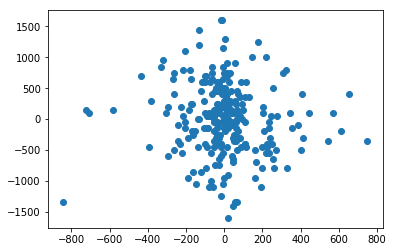

In [86]:
주가변화p = plt.scatter(과거비트코인변화, 다음날주가변화)

입력 X, 출력 Y 분리
- m개의 x, y 쌍
- x(m, 60, 10~15) (국내 증시컬럼 + 비트코인컬림) > reshape -> (m, 60 * 15)
- y(m. 30, 1) # (m. 30) 형태로 봐야한다

In [88]:
input_seq = 60
output_seq = 30
m = len(df) -(input_seq + output_seq) + 1

len(df), m

(244, 155)

In [134]:
#df = df/df.sum() # max 정규화
df = (df-df.min()) / (df.max()-df.min()) # main
x_list = []
y_list = []
for i in range(m):
    x = df.iloc[i : i+input_seq]
    y = df.iloc[i+input_seq:i+input_seq+output_seq][['종가', '종가**']]
    #print(x.shape, y.shape)
    x_list.append(x)
    y_list.append(y)

In [135]:
len(x_list), type(x_list)
# numpy array 로 변환
x_3d =np.stack(x_list, axis=0)
y_3d =np.stack(y_list, axis=0)
x_3d.shape, y_3d.shape

((155, 60, 12), (155, 30, 2))

In [136]:
df.columns

Index(['종가', '전일비', '시가', '고가', '저가', '거래량', '시가*', '고가', '저가', '종가**', '거래량',
       '시가총액'],
      dtype='object')

In [137]:
korea_close_index = 0
bitcoin_close_index = 0

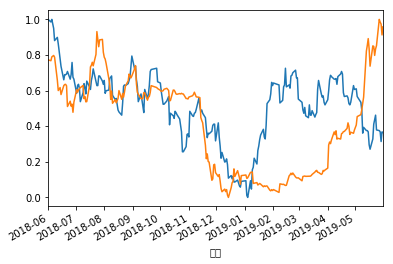

In [138]:
df['종가'].plot()
df['종가**'].plot()

train/ test 분리

In [139]:
test_ratio = 0.1
test_m = int(len(x_3d)  * test_ratio)
test_m

15

In [140]:
m = len(x_3d)
x_2d = np.reshape(x_3d, [m, -1]) 
y_2d = np.reshape(y_3d, [m, -1])

x_test = x_2d[:test_m]
x_train = x_2d[test_m:]
y_test = y_2d[:test_m]
y_train = y_2d[test_m:]

In [141]:
# model , Linear Regressio 가중치를 작게 제약시킨다  -> 모든 정보를 활용해서 예측
from sklearn.linear_model import Ridge

In [142]:
model = Ridge(normalize=True, solver='lsqr').fit(x_train, y_train) # 2차원 이하만 가능

In [143]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9767361862972054, -14.854996557273719)

In [144]:
# 가장최근 데이터
recent = df.iloc[-input_seq:]
recent = np.reshape(np.array(recent), [1,-1])
recent.shape

(1, 720)

In [145]:
p = model.predict(recent) #미래예측
p = np.reshape(p, [output_seq, -1])
p.shape

(30, 2)

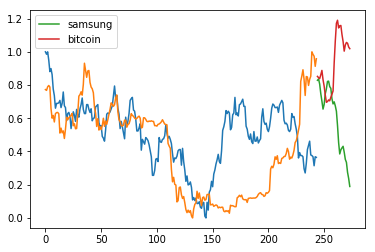

In [146]:
xm = len(df)
plt.plot(np.arange(xm), df['종가'].values)
plt.plot(np.arange(xm),df['종가**'].values)
plt.plot(np.arange(xm, xm+output_seq),p[:, 0], label = 'samsung')
plt.plot(np.arange(xm, xm+output_seq),p[:, 1], label = 'bitcoin')
plt.legend()